In [1]:
import os
os.chdir('..')

In [2]:
DATA_PATH = os.getcwd() + '\\temp'

In [3]:
import functools
from dataset.conclusion_generation import test_for_mental_models, generate_random_tree, generate_and_save_trees
from dataset.logic_tree import OperatorNode
from dataset.encoding import encode_mental_models_separated_sentences, load_sentences_and_conclusions

max_depth = 2
num_variables = 5
input_length = 10
output_length = 5

class SeparatorNode(OperatorNode):
    accepts_children = 2

    def __init__(self, *children):
        super(SeparatorNode, self).__init__('sep', *children)

    def evaluate(self, values):
        value = self._children[0].evaluate(values)
        for child in self._children[1:]:
            value = value and child.evaluate(values)

        return value

    def to_string(self):
        string = f'{self._children[0].to_string()}'
        for child in self._children[1:]:
            string += f' {self._operator_symbol} {child.to_string()}'
        return string


test_for_one_mental_models = functools.partial(test_for_mental_models, allow_only_one_mental_model=False)
# test_for_mental_models_type_two = functools.partial(test_for_mental_models, type_one=False)
# test_for_one_mental_models_type_two = functools.partial(test_for_mental_models, type_one=False,
#                                                         allow_only_one_mental_model=True)
generate_random_sep_tree = functools.partial(generate_random_tree, root_node_cls=SeparatorNode)

generate_and_save_trees('./data', 50000, 2, 5,
                        test_for_one_mental_models, generate_random_sep_tree,
                        base_name='and_trees_single_mms_type_I')

encode_mental_models_separated_sentences('./data', 2, 5, 10,
                                         'encoded_and_trees_single_mms_type_I',
                                         'and_trees_single_mms_type_I')
data = load_sentences_and_conclusions('./data', num_variables=5, max_depth=2,
                                      base_name='encoded_and_trees_single_mms_type_I')
sentences, mental_models, input_dictionary, output_dictionary = data

for i in range(10):
    print(sentences[i])
    print(mental_models[i])
    print()

Checked 100 (0.2%) trees, correct: 90, recently correct: 90.0%, eta: 04s
Checked 200 (0.4%) trees, correct: 178, recently correct: 88.0%, eta: 04s
Checked 300 (0.6%) trees, correct: 258, recently correct: 80.0%, eta: 04s
Checked 400 (0.8%) trees, correct: 334, recently correct: 76.0%, eta: 03s
Checked 500 (1.0%) trees, correct: 403, recently correct: 69.0%, eta: 04s
Checked 600 (1.2%) trees, correct: 468, recently correct: 65.0%, eta: 04s
Checked 700 (1.4%) trees, correct: 528, recently correct: 60.0%, eta: 04s
Checked 800 (1.6%) trees, correct: 588, recently correct: 60.0%, eta: 04s
Checked 900 (1.8%) trees, correct: 640, recently correct: 52.0%, eta: 04s
Checked 1000 (2.0%) trees, correct: 702, recently correct: 62.0%, eta: 04s
Checked 1100 (2.2%) trees, correct: 751, recently correct: 49.0%, eta: 04s
Checked 1200 (2.4%) trees, correct: 808, recently correct: 57.0%, eta: 04s
Checked 1300 (2.6%) trees, correct: 855, recently correct: 47.0%, eta: 04s
Checked 1400 (2.8%) trees, correct:

Checked 11800 (23.6%) trees, correct: 2996, recently correct: 5.0%, eta: 04s
Checked 11900 (23.8%) trees, correct: 3003, recently correct: 7.0%, eta: 04s
Checked 12000 (24.0%) trees, correct: 3009, recently correct: 6.0%, eta: 04s
Checked 12100 (24.2%) trees, correct: 3017, recently correct: 8.0%, eta: 04s
Checked 12200 (24.4%) trees, correct: 3020, recently correct: 3.0%, eta: 04s
Checked 12300 (24.6%) trees, correct: 3027, recently correct: 7.0%, eta: 04s
Checked 12400 (24.8%) trees, correct: 3033, recently correct: 6.0%, eta: 04s
Checked 12500 (25.0%) trees, correct: 3041, recently correct: 8.0%, eta: 04s
Checked 12600 (25.2%) trees, correct: 3050, recently correct: 9.0%, eta: 04s
Checked 12700 (25.4%) trees, correct: 3057, recently correct: 7.0%, eta: 04s
Checked 12800 (25.6%) trees, correct: 3062, recently correct: 5.0%, eta: 04s
Checked 12900 (25.8%) trees, correct: 3070, recently correct: 8.0%, eta: 04s
Checked 13000 (26.0%) trees, correct: 3076, recently correct: 6.0%, eta: 04s

Checked 23600 (47.2%) trees, correct: 3400, recently correct: 0.0%, eta: 02s
Checked 23700 (47.4%) trees, correct: 3400, recently correct: 0.0%, eta: 02s
Checked 23800 (47.6%) trees, correct: 3400, recently correct: 0.0%, eta: 02s
Checked 23900 (47.8%) trees, correct: 3402, recently correct: 2.0%, eta: 02s
Checked 24000 (48.0%) trees, correct: 3403, recently correct: 1.0%, eta: 02s
Checked 24100 (48.2%) trees, correct: 3404, recently correct: 1.0%, eta: 02s
Checked 24200 (48.4%) trees, correct: 3404, recently correct: 0.0%, eta: 02s
Checked 24300 (48.6%) trees, correct: 3405, recently correct: 1.0%, eta: 02s
Checked 24400 (48.8%) trees, correct: 3406, recently correct: 1.0%, eta: 02s
Checked 24500 (49.0%) trees, correct: 3407, recently correct: 1.0%, eta: 02s
Checked 24600 (49.2%) trees, correct: 3407, recently correct: 0.0%, eta: 02s
Checked 24700 (49.4%) trees, correct: 3408, recently correct: 1.0%, eta: 02s
Checked 24800 (49.6%) trees, correct: 3411, recently correct: 3.0%, eta: 02s

Checked 34400 (68.8%) trees, correct: 3467, recently correct: 0.0%, eta: 01s
Checked 34500 (69.0%) trees, correct: 3468, recently correct: 1.0%, eta: 01s
Checked 34600 (69.2%) trees, correct: 3469, recently correct: 1.0%, eta: 01s
Checked 34700 (69.4%) trees, correct: 3469, recently correct: 0.0%, eta: 01s
Checked 34800 (69.6%) trees, correct: 3469, recently correct: 0.0%, eta: 01s
Checked 34900 (69.8%) trees, correct: 3469, recently correct: 0.0%, eta: 01s
Checked 35000 (70.0%) trees, correct: 3469, recently correct: 0.0%, eta: 01s
Checked 35100 (70.2%) trees, correct: 3469, recently correct: 0.0%, eta: 01s
Checked 35200 (70.4%) trees, correct: 3469, recently correct: 0.0%, eta: 01s
Checked 35300 (70.6%) trees, correct: 3470, recently correct: 1.0%, eta: 01s
Checked 35400 (70.8%) trees, correct: 3470, recently correct: 0.0%, eta: 01s
Checked 35500 (71.0%) trees, correct: 3471, recently correct: 1.0%, eta: 01s
Checked 35600 (71.2%) trees, correct: 3471, recently correct: 0.0%, eta: 01s

Checked 46500 (93.0%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 46600 (93.2%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 46700 (93.4%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 46800 (93.6%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 46900 (93.8%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47000 (94.0%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47100 (94.2%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47200 (94.4%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47300 (94.6%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47400 (94.8%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47500 (95.0%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47600 (95.2%) trees, correct: 3487, recently correct: 0.0%, eta: 00s
Checked 47700 (95.4%) trees, correct: 3488, recently correct: 1.0%, eta: 00s

In [4]:
import dataset

[[[ 7  5 10  5  6]
  [ 8  3  0  0  0]]

 [[ 2  0  0  0  0]
  [ 7  2  9  1  6]]

 [[ 7  4  9  5  6]
  [ 7  1 10  2  6]]

 [[ 8  4  0  0  0]
  [ 2  0  0  0  0]]

 [[ 8  5  0  0  0]
  [ 7  1 10  4  6]]]
[[[ 0  0 -1  0  1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  1  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 1  1  0  0  1]
  [ 1  1  0  1  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  1  0 -1  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 1  0  0  1 -1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]]
max_input_length 5
input (None, 2, 5)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2, 5)]       0                                            
____________________________________________________________

354/354 [==============================] - 2s 5ms/step - loss: 2.2275e-04 - val_loss: 6.7550e-04
Epoch 53/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.5970e-04 - val_loss: 6.5425e-04
Epoch 54/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.7106e-04 - val_loss: 6.2788e-04
Epoch 55/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.6921e-04 - val_loss: 6.3843e-04
Epoch 56/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.6060e-04 - val_loss: 5.9912e-04
Epoch 57/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.5868e-04 - val_loss: 7.6111e-04
Epoch 58/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.7024e-04 - val_loss: 5.0190e-04
Epoch 59/1000
354/354 [==============================] - 2s 5ms/step - loss: 1.6670e-04 - val_loss: 6.3123e-04
Epoch 60/1000
354/354 [==============================] - 2s 5ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 61/1000
354/354 [

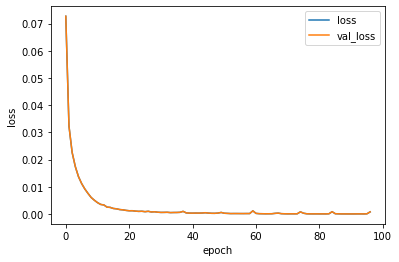

errors:
( 2 or 5 )
not 5
[[ 0.  0.  0. -0. -1.]
 [ 0. -0.  0. -0.  0.]
 [ 0.  0.  0. -0.  0.]
 [-0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.]] [[ 0.  1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 1.0093117e-02  4.2198116e-01  7.4109025e-02 -2.8900651e-02
  -9.7356081e-01]
 [ 3.4245639e-04 -4.4086985e-03  2.4882872e-03 -3.9569160e-04
   6.3640289e-03]
 [ 1.2774719e-05  6.0381833e-05  1.1701745e-03 -4.5087771e-05
   1.0986753e-03]
 [-1.9262987e-04  1.0001648e-04  1.0876094e-03  1.9261031e-05
   8.8084047e-04]
 [-4.1477027e-04  3.6265433e-04  8.7162189e-04  2.1984568e-05
   4.5116668e-04]]

( 5 or 2 )
not 5
[[ 0.  0.  0. -0. -1.]
 [ 0. -0.  0. -0.  0.]
 [ 0.  0.  0. -0.  0.]
 [-0.  0.  0. -0.  0.]
 [-0.  0.  0.  0.  0.]] [[ 0.  1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 4.2941246e-02  4.3501145e-01  3.3967931e-02 -2.9629191e-02
  -9.7263539e-01]
 [ 4.1997959

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as kr


def broadcast(x, y):
    tf.print(x.shape, y.shape)
    x = x[..., np.newaxis]
    y = y[..., np.newaxis]
    x = np.transpose(x, axes=[0, 2, 1])
    y = np.transpose(y, axes=[2, 0, 1])
    x, y = np.broadcast_arrays(x, y)
    return x, y


def calculate_values(x, y):
    s = x + y
    sc = np.clip(s, -1, 1)
    return sc


def calculate_correctness(x, y):
    diff = 1 - np.maximum(0, np.abs(x - y) - 1)
    prod = np.prod(diff, axis=-1)
    return prod


def calculate_values_soft(x, y, av=10):
    return np.tanh((x + y) * av)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def calculate_correctness_soft(x, y, ac=10):
    diff = 1 - sigmoid((np.abs(x - y) - 1.5) * ac)
    prod = np.prod(diff, axis=-1)
    return prod


def calculate_out(values, correctness):
    result = values * correctness[..., np.newaxis]
    reshaped = np.reshape(result, (result.shape[0] * result.shape[1], result.shape[2]))
    return reshaped


def combine_mental_models(mm1, mm2):
    mm1b, mm2b = broadcast(mm1, mm2)
    values = calculate_values(mm1b, mm2b)
    correctness = calculate_correctness(mm1b, mm2b)
    out = calculate_out(values, correctness)
    return out


def combine_mental_models_soft(mm1, mm2):
    mm1b, mm2b = broadcast(mm1, mm2)
    values = calculate_values_soft(mm1b, mm2b, av=10)
    correctness = calculate_correctness_soft(mm1b, mm2b, ac=10)
    out = calculate_out(values, correctness)
    return out


def test_mm_inference():
    # (a or b)      ---> [T, n], [n, T]
    # (a or not b)  ---> [T, n], [n, F]
    mm1 = np.array([
        [1, 0],
        [0, 1],
    ])
    mm2 = np.array([
        [1, 0],
        [0, -1]
    ])

    combined_mental_models = combine_mental_models(mm1, mm2)
    combined_mental_models_soft = combine_mental_models_soft(mm1, mm2)
    print(combined_mental_models)
    print(combined_mental_models_soft)


class MMInferenceLayer(kr.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def broadcast(self, x, y):
        x = tf.expand_dims(x, axis=-1)
        y = tf.expand_dims(y, axis=-1)
        x = tf.transpose(x, perm=[0, 1, 3, 2])
        y = tf.transpose(y, perm=[0, 3, 1, 2])
        # x = tf.broadcast_to(x, (x.shape[0], x.shape[1]))
        # x, y =  np.broadcast_arrays(x, y)
        return x, y

    def call(self, inputs, **kwargs):
        x = inputs[0]
        y = inputs[1]

        x, y = self.broadcast(x, y)

        s = x + y
        value = tf.clip_by_value(s, -1, 1)
        # applicability = (tf.reduce_max(tf.abs(x), axis=-1) * tf.reduce_max(tf.abs(y), axis=-1))
        # value = value * tf.expand_dims(applicability, axis=-1)

        diff = 1 - tf.maximum(0., tf.abs(x - y) - 1.)
        correctness = tf.reduce_prod(diff, axis=-1)
        mms = value * tf.expand_dims(correctness, axis=-1)
        reshaped_value = tf.reshape(mms, (-1, mms.shape[-3] * mms.shape[-2], mms.shape[-1]))
        reshaped_correctness = tf.reshape(correctness, (-1, correctness.shape[-2] * correctness.shape[-1]))
        mm = tf.reduce_sum(reshaped_value, axis=-2)
        mm = mm / tf.reduce_sum(reshaped_correctness, axis=-1, keepdims=True)
        # mm = tf.clip_by_value(mm, -1, 1)
        # mm = tf.tanh(mm)
        return mm


def create_inference_model(num_variables, max_input_length, max_sub_mental_models):
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    input = kr.Input(shape=(2, max_input_length))
    split_layer = kr.layers.Lambda(lambda x: (x[:, 0], x[:, 1]))(input)

    nn_input = kr.Input(max_input_length)
    nn_embedding_layer = kr.layers.Embedding(num_symbols + 1, embedding_size)(nn_input);print(nn_embedding_layer)
    flatten_layer = kr.layers.Flatten()(nn_embedding_layer);print(flatten_layer.shape)
    nn_hidden = kr.layers.Dense(hidden_units, activation='relu')(flatten_layer)
    nn_output = kr.layers.Dense(num_variables * max_sub_mental_models,
                                activation='tanh',
                                activity_regularizer=kr.regularizers.L1(0.0))(nn_hidden)
    nn_reshape = kr.layers.Reshape((max_sub_mental_models, num_variables))(nn_output)
    sub_sequence_nn = kr.Model(inputs=nn_input, outputs=nn_reshape, name='sub-sequence-NN')
    sub_sequence_nn.summary()

    mm = sub_sequence_nn(split_layer[0]), sub_sequence_nn(split_layer[1])
    mm_inference_layer = MMInferenceLayer()(mm)

    model = kr.Model(inputs=input, outputs=mm_inference_layer)
    model.summary()

    return model

def create_varying_inference_model(num_variables, max_input_length):
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    input = kr.Input(shape=(2, max_input_length))

    print('input',input.shape)
    
    nn_input = kr.Input(shape=(num_variables))
    nn_embedding_layer = kr.layers.Embedding(num_symbols+1, embedding_size)(input)
    nn_flatten = tf.keras.layers.Reshape((nn_embedding_layer.shape[1],-1))(nn_embedding_layer)
    encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    encoder_outputs, state_h, state_c = encoder(nn_flatten)
    encoder_states = [state_h, state_c]
    
    decoder_inputs = kr.Input(shape=(None,num_variables))
    decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    decoder_outputs, _, _ = decoder(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = kr.layers.Dense(num_variables, activation='tanh')
    output = decoder_dense(decoder_outputs)
    
#     nn_input = kr.Input(max_input_length)
#     nn_embedding_layer = kr.layers.Embedding(num_symbols + 1, embedding_size)(nn_input)
#     flatten_layer = kr.layers.Flatten()(nn_embedding_layer)
#     print('flatten',flatten_layer.shape)
#     encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
#     encoder_outputs, state_h, state_c = encoder(flatten_layer)

#     decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
#     decoder_outputs, _, _ = decoder(decoder_inputs,
#                                          initial_state=encoder_states)
#     decoder_dense = kr.layers.Dense(num_variables, activation='tanh')
#     decoder_outputs = decoder_dense(decoder_outputs)

    model = kr.Model(inputs=[input, decoder_inputs], outputs=output)
    model.summary()

    return model


def two_way_mse(y_true, y_pred):
    y_true_float = tf.cast(y_true, y_pred.dtype)
    diff = (y_true_float - y_pred) ** 2
    print(diff)
    return tf.reduce_mean(diff)


def show_subsentence_inference(model, ds, decoding_dictionary, idxs):
    sub_model = model.layers[2]
    for i in idxs:
        for j in range(2):
            x = ds.x_test[i][j]
            pred = sub_model.predict(x[np.newaxis, ...])
            print(dataset.encoding.decode_sentence(x, decoding_dictionary, ds.indexed_encoding))
            print(np.rint(pred))
            
def add_zero_row(data, position):
    if position == 'front':
        temp = np.zeros((data.shape[0],data.shape[1]+1,data.shape[2]))
        temp[:,1:,:] = data
    elif position == 'last':
        temp = np.zeros((data.shape[0],data.shape[1]+1,data.shape[2]))
        temp[:,:-1,:] = data
        
    return temp



if __name__ == '__main__':
    import matplotlib.pyplot as plt

    # xs, ys = create_ds()

    from dataset.common import get_separated_sequences_mental_models_dataset
    import dataset.encoding
    ds = get_separated_sequences_mental_models_dataset('./data', 'encoded_and_trees_single_mms_type_I',
                                                       num_variables=5, max_depth=2,
                                                       test_size=.1, valid_size=.1,
                                                       indexed_encoding=True, pad_mental_models=True)

    dec_in, dec_out = dataset.encoding.create_decoding_dictionaries(ds.input_dictionary, ds.output_dictionary)

#     ds.y_train = ds.y_train[..., 0, :]
#     ds.y_valid = ds.y_valid[..., 0, :]
#     ds.y_test = ds.y_test[..., 0, :]

    ds.y_train_d = add_zero_row(ds.y_train, 'front')
    ds.y_train = add_zero_row(ds.y_train, 'last')
    ds.y_valid_d = add_zero_row(ds.y_valid, 'front')
    ds.y_valid = add_zero_row(ds.y_valid, 'last')
    ds.y_test_d = add_zero_row(ds.y_test, 'front')
    ds.y_test = add_zero_row(ds.y_test, 'last')
    
    
#  decoder_train = 
    
    num_variables = 5
    num_operators = 5  # and, or, not
    num_symbols = num_variables + num_operators
    max_input_length = ds.x_train.shape[-1]

#     model = create_inference_model(num_variables, max_input_length,3)
    model = create_varying_inference_model(num_variables, max_input_length)
    model.compile(optimizer=kr.optimizers.Adam(learning_rate=1e-3),
                  loss=kr.losses.mse)

    callbacks = [kr.callbacks.EarlyStopping(patience=20, min_delta=1e-5, restore_best_weights=True)]
    history = model.fit([ds.x_train, ds.y_train_d], ds.y_train, validation_data=([ds.x_valid, ds.y_valid_d], ds.y_valid),
                        epochs=1000, batch_size=8, callbacks=callbacks)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(len(loss)), loss, label='loss')
    plt.plot(range(len(val_loss)), loss, label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    preds = model.predict([ds.x_test, ds.y_test_d])
    preds_int = np.rint(preds)
#     for i in range(preds.shape[0]):
#         print(preds_int[i], preds[i], ds.y_test[i])

    print('errors:')
    for i in range(preds_int.shape[0]):
        if np.sum(np.abs(preds_int[i] - ds.y_test[i])) == 0:
            continue
        print(dataset.encoding.decode_sentence(ds.x_test[i][0], dec_in, ds.indexed_encoding))
        print(dataset.encoding.decode_sentence(ds.x_test[i][1], dec_in, ds.indexed_encoding))
        print(preds_int[i], ds.y_test[i])
        print(preds[i])
        print()

    errors = np.count_nonzero(np.sum(np.abs(preds_int - ds.y_test), axis=-1))
    print('errors', int(errors))
    print(f'accuracy: {int((1 - int(errors)/ds.x_test.shape[0]) * 1000) / 10}%')

In [26]:
import torch
import torch.nn as nn
from torch import optim
import random

class Encoder(nn.Module):
    """ A GRU-based encoder. """
    def __init__(self, input_vocab_size, hidden_size, emb_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_vocab_size, emb_size)
        self.gru = nn.GRU(emb_size, hidden_size)

    def forward(self, input, hidden=None):
        if hidden is not None:  # Update hidden states step by step
            embedded = self.embedding(input).view(1, 1, -1)
            output = embedded
            output, hidden = self.gru(output, hidden)
        else:   # In case we only need the last state
            embedded = self.embedding(input).view(len(input), 1, -1)
            output, hidden = self.gru(embedded)
        return output, hidden

    def init_hidden(self):
        '''Initialize hidden state'''
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [27]:
class Decoder(nn.Module):
    """ A GRU-based decoder. """
    def __init__(self, hidden_size, output_vocab_size, emb_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_vocab_size, emb_size)
        self.gru = nn.GRU(emb_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_vocab_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # Output word embedding
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        # Update decoder hidden state
        output, hidden = self.gru(output, hidden)
        # Distribution over output vocabulary
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def init_hidden(self):
        '''Initialize hidden state'''
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [67]:
import numpy as np
sentences[0][1]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [28]:
input_size = sentences[0][0].shape[1]
output_size = mental_models[0][0].size
hidden_size = 128
report_every = 1000

# Initialize encoder and decoder
enc = Encoder(input_size, hidden_size, emb_size=8)
dec = Decoder(hidden_size, output_size, emb_size=8)

# Initialize the optimizers
enc_optimizer = optim.Adam(enc.parameters())
dec_optimizer = optim.Adam(dec.parameters())
loss_function = nn.NLLLoss()
print_loss_total = 0

for epoch in range(1, 4):  # Train for 3 epochs
    random.shuffle(tensor_dataset)
    for i, instance in enumerate(tensor_dataset):
        src_sequence, tgt_sequence = instance[0], instance[1]
        _, last_enc_state = enc(src_sequence)
        # Create BOS token - First decoder input is the start token 
        decoder_input = torch.tensor([[generator.token_to_idx['<s>']]], device=device)
        # First decoder hidden state is the last encoder hidden state
        decoder_hidden = last_enc_state
        loss = 0

        # For each decoder timestep
        for i_decoder in range(len(tgt_sequence)):
            # Feed decoder input to decoder hidden state. Also feed in encoder outputs for calculating context
            decoder_output, decoder_hidden = dec(decoder_input, decoder_hidden)
            loss += loss_function(decoder_output, tgt_sequence[i_decoder])
            # When training, use the correct label at this step at input to the decoder 
            decoder_input = tgt_sequence[i_decoder]

        loss.backward()

        enc_optimizer.step()
        dec_optimizer.step()
        enc.zero_grad()
        dec.zero_grad()

        print_loss_total += loss.item() / len(tgt_sequence)

        if (i != 0 and i % report_every == 0) or i == len(tensor_dataset)-1:
            print('Epoch {0}: trained {1} input-output pairs, loss {2:.4f}'.format(epoch, i, print_loss_total / report_every))
            print_loss_total = 0

NameError: name 'tensor_dataset' is not defined

In [ ]:
n_tests = 10
n_correct = 0
input_min_val = 10
input_max_val = 100

with torch.no_grad():
    for i in range(n_tests):
        test_pair = generator.generate_equation(input_min_val, input_max_val)
        input_seq = tensor_from_character_sequence(test_pair[0], generator.token_to_idx)

        _, last_enc_state = enc(input_seq)

        # Create BOS token - First decoder input is the start token 
        decoder_input = torch.tensor([generator.token_to_idx['<s>']], device=device)
        # First decoder hidden state is the last encoder hidden state
        decoder_hidden = last_enc_state

        decoded_words = []
        # For each decoder timestep
        for i_decoder in range(10):
            # Feed decoder input to decoder hidden state. Also feed in encoder outputs for calculating context
            decoder_output, decoder_hidden = dec(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)

            if topi.item() == generator.token_to_idx['</s>']:
                break
            else:
                decoded_words.append(generator.idx_to_token[topi.item()])
            # When testing, use the model prediction
            decoder_input = topi.squeeze().detach()

        model_output = ''.join(decoded_words)

        if model_output == test_pair[1]:
            n_correct += 1
            marker = ''
        else:
            marker = '<--------'
        print('Input:\t', test_pair[0])
        print('Model output:\t', model_output, marker)
        print('Ground truth:\t', test_pair[1], '\n')

    print('{0}/{1}, correct rate: {2:0.0%}'.format(n_correct, n_tests, n_correct/n_tests))